In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
import folium
from folium.plugins import FastMarkerCluster
from datetime import datetime
import plotly.express as px

%reload_ext autoreload
%autoreload 2

sns.set_palette("Set2")

#https://www.kaggle.com/datasets/tylerx/sydney-airbnb-open-data

In [2]:
calendar_csv = r'D:\Notes\Mini Project 1\Airbnb Sydney open data\calendar_dec18.csv'
calendar = pd.read_csv(calendar_csv)
calendar.head(5)

listing_id        date available    price
0       14250  2019-12-06         t  $470.00
1       12351  2019-08-17         t  $110.00
2       12351  2019-08-16         t  $110.00
3       12351  2019-08-15         t  $110.00
4       12351  2019-08-14         t  $110.00

In [3]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13381265 entries, 0 to 13381264
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   listing_id  int64 
 1   date        object
 2   available   object
 3   price       object
dtypes: int64(1), object(3)
memory usage: 408.4+ MB


In [4]:
calendar['listing_id'] = calendar['listing_id'].astype(str)

In [5]:
calendar['date'] = pd.to_datetime(calendar.date)

In [6]:
calendar['price'] = calendar['price'].str.replace('$', '')

C:\Users\Clivia\AppData\Local\Temp\ipykernel_30924\2520678659.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar['price'] = calendar['price'].str.replace('$', '')


In [7]:
calendar['price'] = calendar['price'].str.replace(',', '')
#calendar[calendar.price == '1,300.00']

In [8]:
calendar['price'] = calendar['price'].astype(float)

In [9]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13381265 entries, 0 to 13381264
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   listing_id  object        
 1   date        datetime64[ns]
 2   available   object        
 3   price       float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 408.4+ MB


In [10]:
calendar.isnull().sum()

listing_id          0
date                0
available           0
price         9810841
dtype: int64

In [11]:
calendar.price.max()

15000.0

In [12]:
calendar.dropna(subset = ['price', 'listing_id'], how='any', axis = 0)

listing_id       date available  price
0             14250 2019-12-06         t  470.0
1             12351 2019-08-17         t  110.0
2             12351 2019-08-16         t  110.0
3             12351 2019-08-15         t  110.0
4             12351 2019-08-14         t  110.0
...             ...        ...       ...    ...
13381245   30540048 2018-12-26         t  450.0
13381246   30540048 2018-12-25         t  450.0
13381247   30540048 2018-12-24         t  450.0
13381248   30540048 2018-12-23         t  450.0
13381249   30540048 2018-12-22         t  450.0

[3570424 rows x 4 columns]

In [13]:
calendar.isnull().sum()

listing_id          0
date                0
available           0
price         9810841
dtype: int64

In [14]:
calendar.head()

listing_id       date available  price
0      14250 2019-12-06         t  470.0
1      12351 2019-08-17         t  110.0
2      12351 2019-08-16         t  110.0
3      12351 2019-08-15         t  110.0
4      12351 2019-08-14         t  110.0

In [15]:
calendar = calendar[calendar.available == 't']

In [16]:
group_by = ['listing_id']
agg_by = {'price': 'mean'}
calendar_groupby_id = calendar.groupby(by=group_by).agg(agg_by)
calendar_groupby_id

price
listing_id            
10000638     95.801887
10001271     41.612100
10003982    120.000000
10007550    250.000000
1001315     650.000000
...                ...
9992550      42.000000
9993326     450.000000
9994292     262.090909
9995238     248.000000
9996324     953.035144

[24111 rows x 1 columns]

In [17]:
print('calendar dataset including the price listing from ', calendar.date.min(),' to ', calendar.date.max())

calendar dataset including the price listing from  2018-12-07 00:00:00  to  2019-12-06 00:00:00


In [18]:
calendar_0 = calendar_groupby_id.reset_index()
calendar_0.head(3)

listing_id       price
0   10000638   95.801887
1   10001271   41.612100
2   10003982  120.000000

In [19]:
review_csv = r'D:\Notes\Mini Project 1\Airbnb Sydney open data\reviews_dec18.csv'
review = pd.read_csv(review_csv)
review.head(5)

listing_id      id        date  reviewer_id reviewer_name  \
0       12351   68394  2010-07-24        45760          Anna   
1       12351   76453  2010-08-09       148786        Stuart   
2       12351   83283  2010-08-23       190202         Angel   
3       12351   91580  2010-09-06       219308         Meisy   
4       12351  100903  2010-09-20       191976         Dayna   

                                            comments  
0  This was my first Airbnb experience and I am h...  
1  As my first AirBnB experience, this was a magn...  
2  Like many others this was my first AirBnB expe...  
3  Vinh and Stuart were very warm and hospitable,...  
4  I had a wonderful experience staying with Vinh...

In [20]:
review_summary_csv = r'D:\Notes\Mini Project 1\Airbnb Sydney open data\reviews_summary_dec18.csv'
review_summary = pd.read_csv(review_summary_csv)
review_summary.head(5)

listing_id        date
0       12351  2010-07-24
1       12351  2010-08-09
2       12351  2010-08-23
3       12351  2010-09-06
4       12351  2010-09-20

In [21]:
listings_csv = r'D:\Notes\Mini Project 1\Airbnb Sydney open data\listings_dec18.csv'
listings = pd.read_csv(listings_csv)
listings.head(5)

C:\Users\Clivia\AppData\Local\Temp\ipykernel_30924\1798159932.py:2: DtypeWarning: Columns (43,61,62,87) have mixed types. Specify dtype option on import or set low_memory=False.
  listings = pd.read_csv(listings_csv)


id                         listing_url       scrape_id last_scraped  \
0  12351  https://www.airbnb.com/rooms/12351  20181207034750   2018-12-07   
1  14250  https://www.airbnb.com/rooms/14250  20181207034750   2018-12-07   
2  15253  https://www.airbnb.com/rooms/15253  20181207034750   2018-12-07   
3  20865  https://www.airbnb.com/rooms/20865  20181207034750   2018-12-07   
4  26174  https://www.airbnb.com/rooms/26174  20181207034750   2018-12-07   

                                                name  \
0                  Sydney City & Harbour at the door   
1                                Manly Harbour House   
2  Stunning Penthouse Apartment In Heart Of The City   
3                 3 BED HOUSE + 1 BED STUDIO Balmain   
4                 COZY PRIVATE ROOM, GREAT LOCATION!   

                                             summary  \
0  Come stay with Vinh & Stuart (Awarded as one o...   
1  Beautifully renovated, spacious and quiet, our...   
2  Penthouse living in a great central location: ...   
3  Hi! We are a married professional couple with ...   
4                                                NaN   

                                               space  \
0  We're pretty relaxed hosts, and we fully appre...   
1  Our home is a thirty minute walk along the sea...   
2  A charming two-level, two-bedroom, two-bathroo...   
3  HOUSE : _________ * DUCTED AIR CONDITIONING IN...   
4  Double bed in decent sized bedroom, in two bed...   

                                         description experiences_offered  \
0  Come stay with Vinh & Stuart (Awarded as one o...                none   
1  Beautifully renovated, spacious and quiet, our...                none   
2  Penthouse living in a great central location: ...                none   
3  Hi! We are a married professional couple with ...                none   
4  Double bed in decent sized bedroom, in two bed...                none   

                               neighborhood_overview  ... requires_license  \
0  Pyrmont is an inner-city village of Sydney, on...  ...                f   
1  Balgowlah Heights is one of the most prestigio...  ...                f   
2  The location is really central and there is nu...  ...                f   
3  BALMAIN is an older inner city village / subur...  ...                f   
4                                                NaN  ...                f   

  license jurisdiction_names instant_bookable is_business_travel_ready  \
0     NaN                NaN                f                        f   
1     NaN                NaN                f                        f   
2     NaN                NaN                t                        f   
3     NaN                NaN                f                        f   
4     NaN                NaN                f                        f   

           cancellation_policy  require_guest_profile_picture  \
0  strict_14_with_grace_period                              t   
1  strict_14_with_grace_period                              f   
2  strict_14_with_grace_period                              f   
3  strict_14_with_grace_period                              t   
4                     moderate                              f   

  require_guest_phone_verification  calculated_host_listings_count  \
0                                t                               2   
1                                f                               2   
2                                f                               2   
3                                t                               1   
4                                f                               1   

   reviews_per_month  
0               4.83  
1               0.03  
2               3.63  
3               0.18  
4               0.45  

[5 rows x 96 columns]

In [22]:
neighbour_csv = r'D:\Notes\Mini Project 1\Airbnb Sydney open data\neighbourhoods_dec18.csv'
neighbour = pd.read_csv(neighbour_csv)
neighbour.head(5)

neighbourhood_group neighbourhood
0                  NaN      Ashfield
1                  NaN        Auburn
2                  NaN     Bankstown
3                  NaN     Blacktown
4                  NaN    Botany Bay

In [23]:
# listing summary data
data_csv = r'D:\Notes\Mini Project 1\Airbnb Sydney open data\listings_summary_dec18.csv'
data = pd.read_csv(data_csv)
data.head(5)

id                                               name  host_id  \
0  12351                  Sydney City & Harbour at the door    17061   
1  14250                                Manly Harbour House    55948   
2  15253  Stunning Penthouse Apartment In Heart Of The City    59850   
3  20865                 3 BED HOUSE + 1 BED STUDIO Balmain    64282   
4  26174                 COZY PRIVATE ROOM, GREAT LOCATION!   110561   

  host_name  neighbourhood_group neighbourhood   latitude   longitude  \
0    Stuart                  NaN        Sydney -33.865153  151.191896   
1     Heidi                  NaN         Manly -33.800929  151.261722   
2     Morag                  NaN        Sydney -33.880455  151.216541   
3     Fiona                  NaN    Leichhardt -33.859072  151.172753   
4    Amanda                  NaN     Woollahra -33.889087  151.259404   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    100               2                493  2018-11-21   
1  Entire home/apt    471               5                  1  2016-01-02   
2     Private room    109               2                300  2018-11-16   
3  Entire home/apt    450               7                 15  2018-01-07   
4     Private room     62               1                 42  2018-11-23   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               4.83                               2               187  
1               0.03                               2               321  
2               3.63                               2               316  
3               0.18                               1                69  
4               0.45                               1               140

In [24]:
data.tail(5)

id                                               name    host_id  \
36657  30592081                             The top floor paradise  229475098   
36658  30592161   Sydney harbour catamaran sailing. Parties for 10  223580521   
36659  30592248  Double Room built-in a large and bright apartment  119396721   
36660  30592505     Bright Modern apartment in a Premiere location  229479027   
36661  30593866   Huge Sunny Double Room with Spa in Best Location   51138070   

             host_name  neighbourhood_group neighbourhood   latitude  \
36657          Sharney                  NaN     Woollahra -33.874940   
36658            Blake                  NaN    Canada Bay -33.847841   
36659           Nelson                  NaN   Strathfield -33.863719   
36660   Sofei & Kelvin                  NaN      Rockdale -33.929960   
36661  Aaron & Natalie                  NaN        Sydney -33.906938   

        longitude        room_type  price  minimum_nights  number_of_reviews  \
36657  151.259375  Entire home/apt    190              10                  0   
36658  151.149573  Entire home/apt    900               1                  0   
36659  151.081721     Private room     46               4                  0   
36660  151.150659  Entire home/apt    170               2                  0   
36661  151.211255     Private room     80               5                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
36657         NaN                NaN                               1   
36658         NaN                NaN                               1   
36659         NaN                NaN                               1   
36660         NaN                NaN                               1   
36661         NaN                NaN                               3   

       availability_365  
36657               172  
36658               168  
36659                11  
36660                89  
36661                11

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36662 entries, 0 to 36661
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36662 non-null  int64  
 1   name                            36650 non-null  object 
 2   host_id                         36662 non-null  int64  
 3   host_name                       36656 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   36662 non-null  object 
 6   latitude                        36662 non-null  float64
 7   longitude                       36662 non-null  float64
 8   room_type                       36662 non-null  object 
 9   price                           36662 non-null  int64  
 10  minimum_nights                  36662 non-null  int64  
 11  number_of_reviews               36662 non-null  int64  
 12  last_review                     

In [37]:
# convert id and host_id to string
data['id'] = data['id'].astype(str)
data['host_id'] = data['host_id'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36662 entries, 0 to 36661
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36662 non-null  object 
 1   name                            36650 non-null  object 
 2   host_id                         36662 non-null  object 
 3   host_name                       36656 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   36662 non-null  object 
 6   latitude                        36662 non-null  float64
 7   longitude                       36662 non-null  float64
 8   room_type                       36662 non-null  object 
 9   price                           36662 non-null  int64  
 10  minimum_nights                  36662 non-null  int64  
 11  number_of_reviews               36662 non-null  int64  
 12  last_review                     

In [38]:
# convert last_view to date
data.last_review = pd.to_datetime(data.last_review, format='%Y/%m/%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36662 entries, 0 to 36661
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              36662 non-null  object        
 1   name                            36650 non-null  object        
 2   host_id                         36662 non-null  object        
 3   host_name                       36656 non-null  object        
 4   neighbourhood_group             0 non-null      float64       
 5   neighbourhood                   36662 non-null  object        
 6   latitude                        36662 non-null  float64       
 7   longitude                       36662 non-null  float64       
 8   room_type                       36662 non-null  object        
 9   price                           36662 non-null  int64         
 10  minimum_nights                  36662 non-null  int64         
 11  nu

In [39]:
data.shape

(36662, 16)

In [40]:
# neighbourhood_group is empty, so drop neighbourhood_group column
data = data.drop(columns=['neighbourhood_group'])
data.head(2)

id                               name host_id host_name neighbourhood  \
0  12351  Sydney City & Harbour at the door   17061    Stuart        Sydney   
1  14250                Manly Harbour House   55948     Heidi         Manly   

    latitude   longitude        room_type  price  minimum_nights  \
0 -33.865153  151.191896     Private room    100               2   
1 -33.800929  151.261722  Entire home/apt    471               5   

   number_of_reviews last_review  reviews_per_month  \
0                493  2018-11-21               4.83   
1                  1  2016-01-02               0.03   

   calculated_host_listings_count  availability_365  
0                               2               187  
1                               2               321

In [41]:
data['availability_perc'] = data['availability_365']/365
data.head(5)

id                                               name host_id host_name  \
0  12351                  Sydney City & Harbour at the door   17061    Stuart   
1  14250                                Manly Harbour House   55948     Heidi   
2  15253  Stunning Penthouse Apartment In Heart Of The City   59850     Morag   
3  20865                 3 BED HOUSE + 1 BED STUDIO Balmain   64282     Fiona   
4  26174                 COZY PRIVATE ROOM, GREAT LOCATION!  110561    Amanda   

  neighbourhood   latitude   longitude        room_type  price  \
0        Sydney -33.865153  151.191896     Private room    100   
1         Manly -33.800929  151.261722  Entire home/apt    471   
2        Sydney -33.880455  151.216541     Private room    109   
3    Leichhardt -33.859072  151.172753  Entire home/apt    450   
4     Woollahra -33.889087  151.259404     Private room     62   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               2                493  2018-11-21               4.83   
1               5                  1  2016-01-02               0.03   
2               2                300  2018-11-16               3.63   
3               7                 15  2018-01-07               0.18   
4               1                 42  2018-11-23               0.45   

   calculated_host_listings_count  availability_365  availability_perc  
0                               2               187           0.512329  
1                               2               321           0.879452  
2                               2               316           0.865753  
3                               1                69           0.189041  
4                               1               140           0.383562

In [42]:
data.describe()

latitude     longitude         price  minimum_nights  \
count  36662.000000  36662.000000  36662.000000    36662.000000   
mean     -33.863112    151.204259    207.689597        5.096885   
std        0.071501      0.083529    323.818795       15.664862   
min      -34.135212    150.642903      0.000000        1.000000   
25%      -33.898444    151.179678     80.000000        1.000000   
50%      -33.882486    151.215923    136.000000        2.000000   
75%      -33.832072    151.261413    223.000000        5.000000   
max      -33.389728    151.339811  14999.000000     1000.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       36662.000000       24725.000000                    36662.000000   
mean           12.185178           1.139057                        7.115106   
std            28.652548           1.536521                       24.611284   
min             0.000000           0.010000                        1.000000   
25%             0.000000           0.140000                        1.000000   
50%             2.000000           0.490000                        1.000000   
75%             9.000000           1.520000                        2.000000   
max           493.000000          15.180000                      197.000000   

       availability_365  availability_perc  
count      36662.000000       36662.000000  
mean          97.387595           0.266815  
std          122.969054           0.336902  
min            0.000000           0.000000  
25%            0.000000           0.000000  
50%           36.000000           0.098630  
75%          165.000000           0.452055  
max          365.000000           1.000000

In [43]:
data.isnull().sum()

id                                    0
name                                 12
host_id                               0
host_name                             6
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       11937
reviews_per_month                 11937
calculated_host_listings_count        0
availability_365                      0
availability_perc                     0
dtype: int64

In [44]:
data.id.nunique()

36662

In [45]:
data.neighbourhood.nunique()

38

In [46]:
print('Number of Sydney Airbnb Listings:', data.shape[0])
print('Number of features in dataset:', data.shape[1])
print('Avarage price is : $',round(data.price.mean()))
print('Number of hosts/suppliers: ', data.host_id.nunique())
print('Number of suburbs: ', data.neighbourhood.nunique())

Number of Sydney Airbnb Listings: 36662
Number of features in dataset: 16
Avarage price is : $ 208
Number of hosts/suppliers:  27219
Number of suburbs:  38


In [47]:
data.neighbourhood.unique()

array(['Sydney', 'Manly', 'Leichhardt', 'Woollahra', 'North Sydney',
       'Waverley', 'Mosman', 'Pittwater', 'Lane Cove', 'Marrickville',
       'The Hills Shire', 'Hornsby', 'Warringah', 'Randwick',
       'Sutherland Shire', 'Ku-Ring-Gai', 'Canterbury', 'Blacktown',
       'Willoughby', 'Auburn', 'Canada Bay', 'Ashfield',
       'City Of Kogarah', 'Parramatta', 'Hurstville', 'Ryde', 'Rockdale',
       'Botany Bay', 'Holroyd', 'Penrith', 'Hunters Hill', 'Burwood',
       'Campbelltown', 'Strathfield', 'Camden', 'Liverpool', 'Bankstown',
       'Fairfield'], dtype=object)

In [48]:
data.groupby(['neighbourhood']).count()

id  name  host_id  host_name  latitude  longitude  \
neighbourhood                                                           
Ashfield           306   306      306        306       306        306   
Auburn             469   469      469        469       469        469   
Bankstown          180   180      180        180       180        180   
Blacktown          237   237      237        237       237        237   
Botany Bay         600   600      600        600       600        600   
Burwood            249   249      249        249       249        249   
Camden              29    29       29         29        29         29   
Campbelltown       101   101      101        101       101        101   
Canada Bay         449   447      449        449       449        449   
Canterbury         339   339      339        339       339        339   
City Of Kogarah    179   179      179        179       179        179   
Fairfield           76    76       76         76        76         76   
Holroyd            125   125      125        125       125        125   
Hornsby            391   391      391        391       391        391   
Hunters Hill        69    69       69         69        69         69   
Hurstville         195   195      195        195       195        195   
Ku-Ring-Gai        340   340      340        339       340        340   
Lane Cove          289   289      289        289       289        289   
Leichhardt         999   999      999        999       999        999   
Liverpool          116   116      116        116       116        116   
Manly             1800  1800     1800       1800      1800       1800   
Marrickville      1252  1252     1252       1251      1252       1252   
Mosman             534   534      534        534       534        534   
North Sydney      1370  1370     1370       1370      1370       1370   
Parramatta         520   520      520        520       520        520   
Penrith            132   132      132        132       132        132   
Pittwater         1192  1192     1192       1192      1192       1192   
Randwick          3346  3346     3346       3346      3346       3346   
Rockdale           729   729      729        729       729        729   
Ryde               575   575      575        575       575        575   
Strathfield        171   171      171        171       171        171   
Sutherland Shire   468   468      468        468       468        468   
Sydney            9241  9236     9241       9241      9241       9241   
The Hills Shire    260   260      260        260       260        260   
Warringah         1794  1793     1794       1794      1794       1794   
Waverley          5467  5463     5467       5464      5467       5467   
Willoughby         500   500      500        500       500        500   
Woollahra         1573  1573     1573       1572      1573       1573   

                  room_type  price  minimum_nights  number_of_reviews  \
neighbourhood                                                           
Ashfield                306    306             306                306   
Auburn                  469    469             469                469   
Bankstown               180    180             180                180   
Blacktown               237    237             237                237   
Botany Bay              600    600             600                600   
Burwood                 249    249             249                249   
Camden                   29     29              29                 29   
Campbelltown            101    101             101                101   
Canada Bay              449    449             449                449   
Canterbury              339    339             339                339   
City Of Kogarah         179    179             179                179   
Fairfield                76     76              76                 76   
Holroyd                 125    125             125                125   
Horn

<AxesSubplot:ylabel='neighbourhood'>

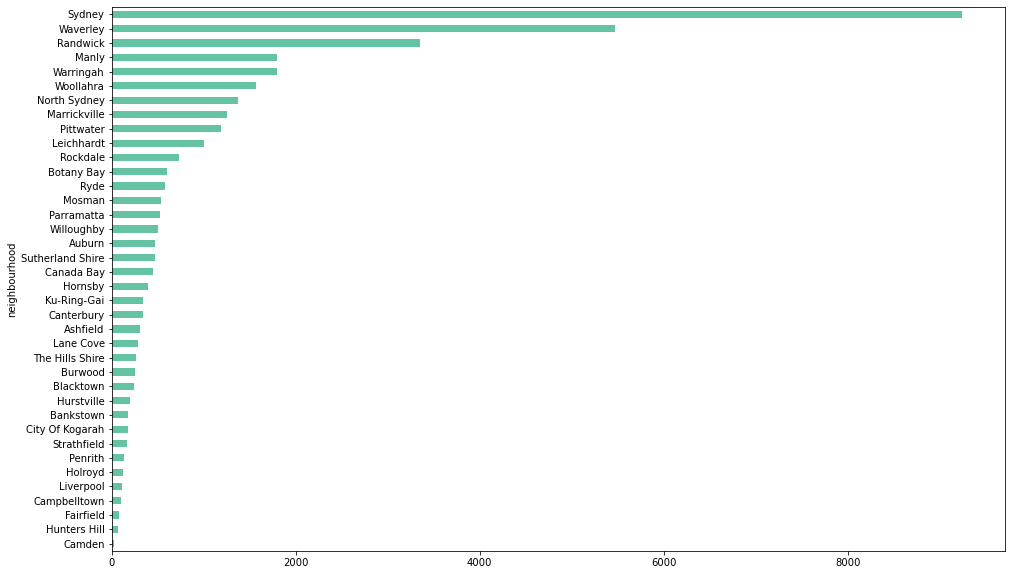

In [49]:
plt.figure(figsize =(16,10))
data.groupby(['neighbourhood'])['id'].count().sort_values().plot.barh()

In [50]:
lat = data['latitude']
lon = data['longitude']
locations = list(zip(lat, lon))

map_base = folium.Map(location=[-33.8688, 151.2093],tiles='CartoDB Positron',zoom_start=8) 
FastMarkerCluster(data=locations).add_to(map_base)
map_base

In [51]:
def get_suburb_group_list(url,n):
    #url is the url address of fetching table
    #n is the n in tables[n]
    tables = pd.read_html(url)
    table = tables[n]
    list = table['Name'].tolist()
    return list

In [52]:
url_full = 'https://sydneysuburbreviews.com/suburb-rankings/'
tables = pd.read_html(url_full)
table = tables[0]
table = table[['Name','Region']]
table.shape

(421, 2)

In [53]:
def clean_column_name(column_names):
    clean_column_names = []
    for c in column_names:
        c = c.lower().replace(' ', '_')
        c = c.lower().replace('*', '')
        c = c.lower().replace('?', '')
        clean_column_names.append(c)
    return clean_column_names
data.neighbourhood = clean_column_name(data.neighbourhood)
table.Name = clean_column_name(table.Name)
table.Name

C:\Users\Clivia\AppData\Local\Temp\ipykernel_23412\730370572.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table.Name = clean_column_name(table.Name)


0           hornsby
1            oatley
2      dulwich_hill
3           jannali
4          waverton
           ...     
416         yagoona
417     yarrawarrah
418         yennora
419       yowie_bay
420    bexley_north
Name: Name, Length: 421, dtype: object

In [54]:
data = data.merge(table, left_on= 'neighbourhood', right_on= 'Name', how = 'left')
data.head(5)

id                                               name host_id host_name  \
0  12351                  Sydney City & Harbour at the door   17061    Stuart   
1  14250                                Manly Harbour House   55948     Heidi   
2  15253  Stunning Penthouse Apartment In Heart Of The City   59850     Morag   
3  20865                 3 BED HOUSE + 1 BED STUDIO Balmain   64282     Fiona   
4  26174                 COZY PRIVATE ROOM, GREAT LOCATION!  110561    Amanda   

  neighbourhood   latitude   longitude        room_type  price  \
0        sydney -33.865153  151.191896     Private room    100   
1         manly -33.800929  151.261722  Entire home/apt    471   
2        sydney -33.880455  151.216541     Private room    109   
3    leichhardt -33.859072  151.172753  Entire home/apt    450   
4     woollahra -33.889087  151.259404     Private room     62   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               2                493  2018-11-21               4.83   
1               5                  1  2016-01-02               0.03   
2               2                300  2018-11-16               3.63   
3               7                 15  2018-01-07               0.18   
4               1                 42  2018-11-23               0.45   

   calculated_host_listings_count  availability_365  availability_perc  \
0                               2               187           0.512329   
1                               2               321           0.879452   
2                               2               316           0.865753   
3                               1                69           0.189041   
4                               1               140           0.383562   

         Name            Region  
0         NaN               NaN  
1       manly  Northern Beaches  
2         NaN               NaN  
3  leichhardt        Inner West  
4   woollahra   Eastern Suburbs

In [55]:
data.shape

(36662, 18)

In [56]:
data.isnull().sum()

id                                    0
name                                 12
host_id                               0
host_name                             6
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       11937
reviews_per_month                 11937
calculated_host_listings_count        0
availability_365                      0
availability_perc                     0
Name                              14523
Region                            14523
dtype: int64

In [57]:
data[data.Region.isnull()].neighbourhood.unique()

array(['sydney', 'pittwater', 'the_hills_shire', 'warringah',
       'sutherland_shire', 'ku-ring-gai', 'canada_bay', 'city_of_kogarah',
       'botany_bay'], dtype=object)

In [58]:
data.Region.unique()

array([nan, 'Northern Beaches', 'Inner West', 'Eastern Suburbs',
       'Lower North Shore', 'North Shore', 'Upper North Shore',
       'Western Suburbs', 'Southern Suburbs', 'Northern Suburbs',
       'South West'], dtype=object)

<AxesSubplot:xlabel='Region', ylabel='price'>

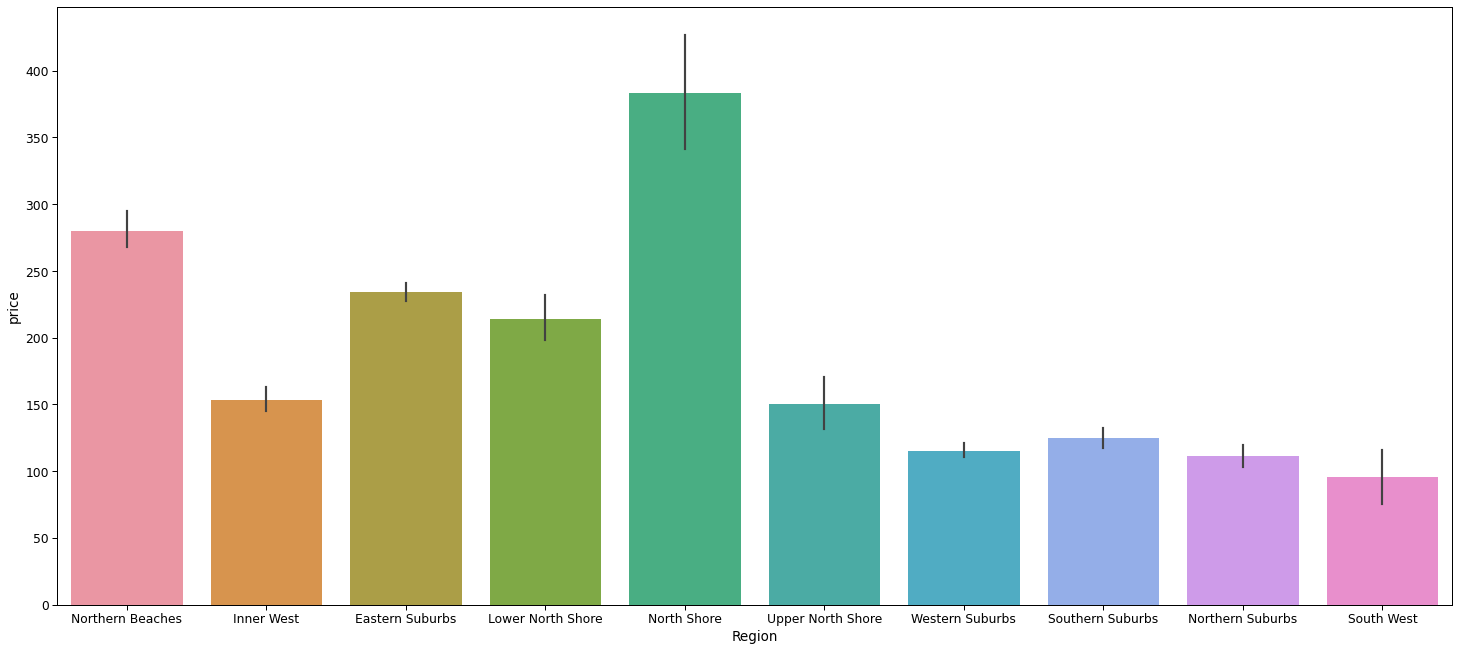

In [59]:
plt.figure(figsize = (25,11))
sns.set_context('paper', font_scale=1.4)
sns.barplot(x='Region', y='price', data = data)

In [60]:
data.loc[data.neighbourhood == 'sydney', 'Region'] = 'sydney_cbd'
data.loc[data.neighbourhood == 'pittwater', 'Region'] = 'Northern Beaches'
data.loc[data.neighbourhood == 'the_hills_shire', 'Region'] = 'Northern West'
data.loc[data.neighbourhood == 'warringah', 'Region'] = 'Northern Suburbs'
data.loc[data.neighbourhood == 'sutherland_shire', 'Region'] = 'Southern Suburbs'
data.loc[data.neighbourhood == 'ku-ring-gai', 'Region'] = 'Northern Suburbs'
data.loc[data.neighbourhood == 'canada_bay', 'Region'] = 'Inner West'
data.loc[data.neighbourhood == 'city_of_kogarah', 'Region'] = 'Southern Suburbs'
data.loc[data.neighbourhood == 'botany_bay', 'Region'] = 'Eastern Suburbs'

In [61]:
plt.figure(figsize = (25,11))
sns.set_context('paper', font_scale=1.4)
sns.countplot(x = 'Region', data = data)

<AxesSubplot:xlabel='Region', ylabel='count'>

In [62]:
data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [63]:
data[data.neighbourhood == 'waverley']

id                                               name    host_id  \
6         39348                                 Large Bondi studio     168828   
8         45440  Rubys @ Bondi Beach! Huge beachhouse on the be...     201611   
9         56842    Beach Breeze 2 BDR + Double balcony+ LOCATION !     113874   
10        57183                  BONDI BEACHFRONT CENTRAL LOCATION    1623151   
12        58954                Christmas New Year - eastern Sydney     282630   
...         ...                                                ...        ...   
36625  30579201      Well located private bedroom in Sydney, Bondi  152420455   
36635  30587470        Large bedroom - 200m to bondi beach & shops    6414893   
36642  30590016     Outstanding Bondi Beach Seascape 3br apartment    3609508   
36652  30590989        quite and clean in a beautiful Neighborhood  107329920   
36654  30591608         THE DUNES-hosted by: L'Abode Accommodation    7409213   

                              host_name neighbourhood   latitude   longitude  \
6                                 Marie      waverley -33.884821  151.282945   
8                               Deborah      waverley -33.889087  151.274506   
9             Bondi Beach Holiday Homes      waverley -33.889633  151.283553   
10                                Susan      waverley -33.891846  151.273084   
12                                Peter      waverley -33.891763  151.242593   
...                                 ...           ...        ...         ...   
36625                            Philip      waverley -33.890276  151.260955   
36635                            Morgan      waverley -33.887472  151.268683   
36642                             Elise      waverley -33.897187  151.273737   
36652                             Yuval      waverley -33.866273  151.280892   
36654  L'Abode Accommodation Specialist      waverley -33.888425  151.264380   

             room_type  price  minimum_nights  number_of_reviews last_review  \
6      Entire home/apt     84               5                  6  2018-11-17   
8      Entire home/apt    700               3                 54  2018-10-23   
9      Entire home/apt    226               2                 17  2018-11-25   
10     Entire home/apt    130               4                121  2018-10-07   
12     Entire home/apt   1073               7                  0         NaT   
...                ...    ...             ...                ...         ...   
36625     Private room    199               1                  0         NaT   
36635     Private room    100               5                  0         NaT   
36642  Entire home/apt    700               7                  0         NaT   
36652     Private room    100               1                  0         NaT   
36654  Entire home/apt    210               3                  0         NaT   

       reviews_per_month  calculated_host_listings_count  availability_365  \
6                   0.77                               2               194   
8                   0.88                              10               301   
9                   0.24                              53                 0   
10                  1.25                               1                54   
12                   NaN                               1               365   
...                  ...                             ...               ...   
36625                NaN                               1                13   
36635                NaN                               2                16   
36642                NaN                              10                12   
36652                NaN                               1               364   
36654                NaN                             176               115   

       availability_perc      Name           Region  
6               0.531507  waverley  Eastern Suburbs  
8               0.824658  waverley  Eastern Suburbs  
9               0.0

<AxesSubplot:xlabel='Region', ylabel='price'>

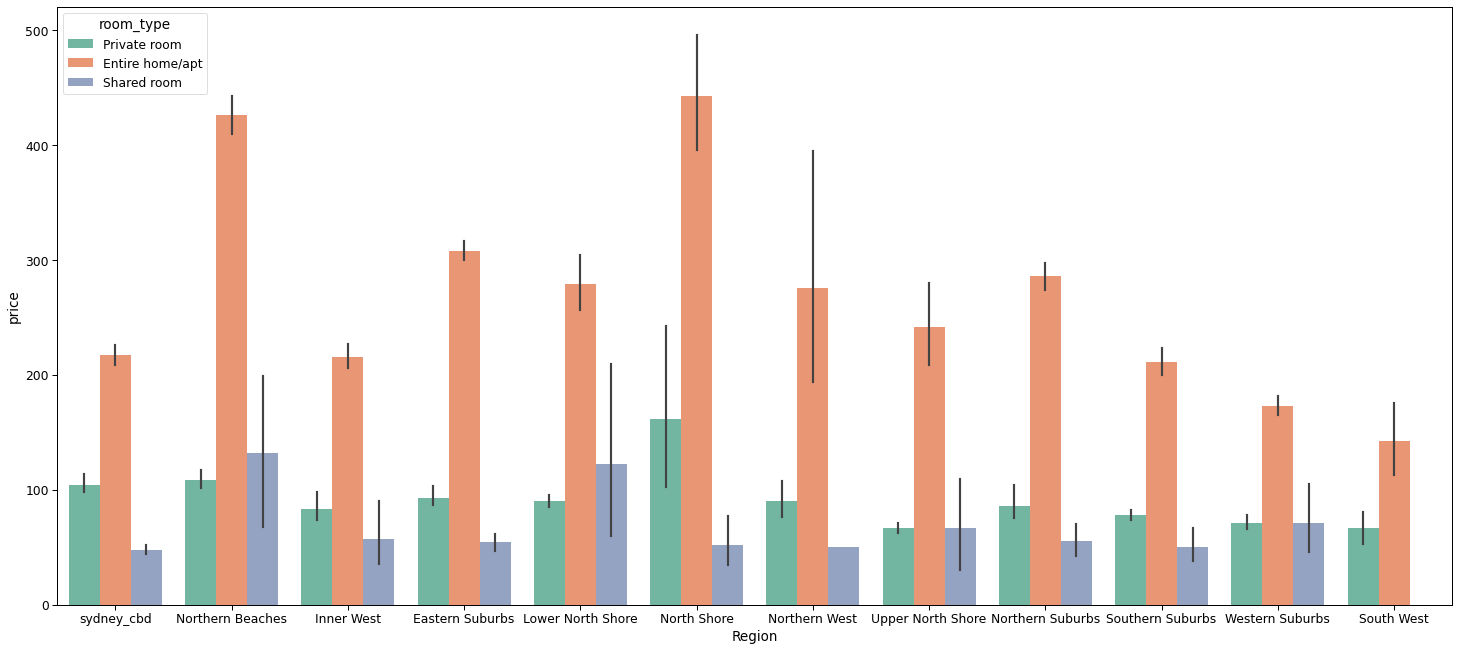

In [64]:
plt.figure(figsize = (25,11))
sns.set_context('paper', font_scale=1.4)
sns.barplot(x='Region', y='price', hue = 'room_type', data = data)

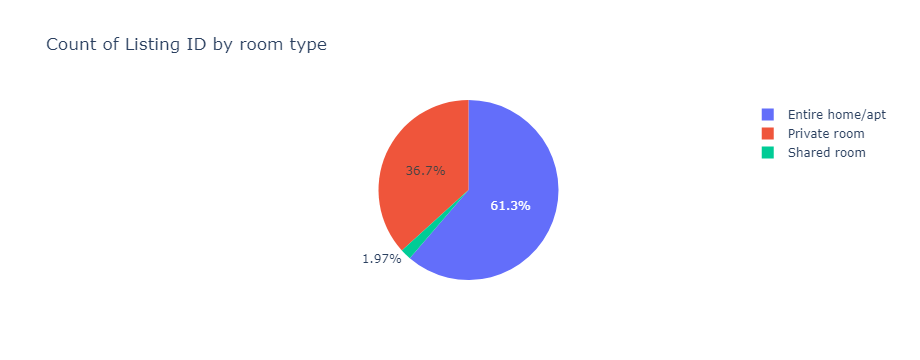

In [68]:
fig = px.pie(data, values='id', names = 'room_type', title = 'Count of Listing ID by room type')
fig.show()

In [ ]:
plt.pie(data['id'], labels = data['room_type'], autopct = '%0.0f%%')
plt.show()

In [ ]:
data.corr()

In [ ]:
plt.figure(figsize = (25,11))
sns.set_context('paper', font_scale=1.4)
sns.stripplot(x='Region', y='price', hue = 'room_type', data = data)

In [ ]:
condition1 = data.room_type == 'Private room'
condition2 = data.price >=10000
data[condition1 & condition2]

In [ ]:
condition3 = data.room_type == 'Entire home/apt'
condition4 = data.price >=10000
data[condition3 & condition4]

In [ ]:
data_0 = data.drop(columns=['latitude','longitude'])
data_g = sns.PairGrid(data_0, hue='room_type')
data_g.map(plt.scatter)
data_g.add_legend()

In [ ]:
data_g = sns.pairplot(data_0, hue='room_type')
data_g.map(plt.scatter)
data_g.add_legend()

In [ ]:
data_g = sns.FacetGrid(data_0, col='room_type')
data_g.map(plt.scatter, 'price', 'availability_perc')


In [ ]:
data_g = sns.FacetGrid(data_0, col='room_type')
data_g.map(plt.scatter, 'price', 'number_of_reviews')

# Business Questions

In [80]:
from scipy import stats

In [81]:
data.head(3)

id                                               name host_id host_name  \
0  12351                  Sydney City & Harbour at the door   17061    Stuart   
1  14250                                Manly Harbour House   55948     Heidi   
2  15253  Stunning Penthouse Apartment In Heart Of The City   59850     Morag   

  neighbourhood   latitude   longitude        room_type  price  \
0        sydney -33.865153  151.191896     Private room    100   
1         manly -33.800929  151.261722  Entire home/apt    471   
2        sydney -33.880455  151.216541     Private room    109   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               2                493  2018-11-21               4.83   
1               5                  1  2016-01-02               0.03   
2               2                300  2018-11-16               3.63   

   calculated_host_listings_count  availability_365  availability_perc   Name  \
0                               2               187           0.512329    NaN   
1                               2               321           0.879452  manly   
2                               2               316           0.865753    NaN   

             Region  
0        sydney_cbd  
1  Northern Beaches  
2        sydney_cbd

# 1. Is there any difference in the number of reviews between entire home and non-entire home(shared room and private room)

Assume shared room and private room are non-entire room
And Prices increase when the number of reviews increase

Two datasets:
Entire_home: Room type is entire home/apartment
Non_entire_home: Room type is private or shared room

In [82]:
null_hypothesis_1 = {
    'H0': "There is no difference in the number of reviews between entire home and non-entire home",
    'H1': "There is a difference in the number of reviews between entire home and non-entire home."
}

In [83]:
data_1 = data[data['last_review'] < '2018-01-01']

In [84]:
alpha = 0.05
N = 100
Entire_home_review = data_1[data_1['room_type'] == 'Entire home/apt']['number_of_reviews'].sample(N, random_state = 42)
Non_entire_home_review= data_1[(data_1['room_type'] =='Private room')|(data_1['room_type'] == 'Shared room')]['number_of_reviews'].sample(N, random_state = 42)

In [85]:
Entire_home_review

3551      1
2869      9
5701      2
7480      1
4109     18
         ..
74       12
3705      1
13394     1
10656     2
1222      1
Name: number_of_reviews, Length: 100, dtype: int64

In [86]:
Non_entire_home_review

14781     2
5245      1
17062    15
492      51
14338     4
         ..
17244     2
10761     1
10168    18
7330      5
8993     44
Name: number_of_reviews, Length: 100, dtype: int64

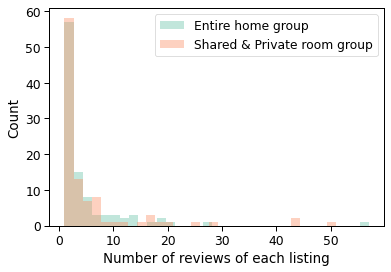

In [115]:
ax = sns.distplot(Entire_home_review, label ='Entire home group', kde = False);
sns.distplot(Non_entire_home_review, ax = ax,  label = 'Shared & Private room group', kde = False);
plt.legend(loc = 'upper right')
plt.xlabel('Number of reviews of each listing')
plt.ylabel('Count')
plt.show();# put on same charts

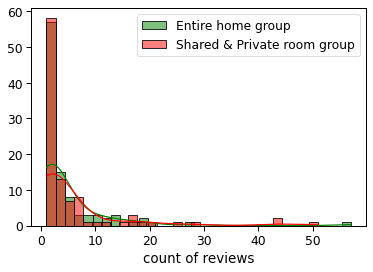

In [110]:
ax = sns.histplot(Entire_home_review, label ='Entire home group', kde = True, color = 'g');
sns.histplot(Non_entire_home_review, ax = ax,  label = 'Shared & Private room group', kde = True, color = 'r');
plt.legend(loc = 'upper right')
plt.xlabel('count of reviews')
plt.ylabel('')
plt.show();

In [88]:
def print_sig(p_value, alpha,null_hypothesis):
    '''
    Inputs:
    p_value: Calculated p_value
    alpha: Confidence level
    '''
    if p_value < alpha:
        print("We reject our null hypothesis,accept H1 statement")
        print(null_hypothesis['H1'])
    elif p_value > alpha:
        print("We fail to reject our null hypothesis, accept H0 statement")
        print(null_hypothesis['H0'])
    else:
        print("Our test is inconclusive.")

In [89]:
t1, p1 = stats.ttest_ind(Entire_home_review, Non_entire_home_review)
print("t = " + str(t1))
print("p = " + str(p1))
print_sig(p1, alpha,null_hypothesis_1)

t = -0.5132238257410021
p = 0.6083669258581096
We fail to reject our null hypothesis, accept H0 statement
There is no difference in the number of reviews between entire home and non-entire home


# 2. Prices increases for Entire home listings

In [90]:
null_hypothesis_2 = {
    'H0': "Listing price does not increase for entire home listing",
    'H1': "Listing price increases for entire home listing."
}

In [91]:
data_2 = data

In [92]:
alpha = 0.05
N = 100
Entire_home_price = data_2[data_2['room_type'] == 'Entire home/apt']['price'].sample(N, random_state = 42)
Non_entire_home_price= data_2[(data_2['room_type'] =='Private room')|(data_2['room_type'] == 'Shared room')]['price'].sample(N, random_state = 42)

In [93]:
t2, p2 = stats.ttest_ind(Entire_home_price, Non_entire_home_price)
print("t = " + str(t2))
print("p = " + str(p2))
print_sig(p2, alpha,null_hypothesis_2)

t = 6.450692579937282
p = 8.356578671723951e-10
We reject our null hypothesis,accept H1 statement
Listing price increases for entire home listing.


# 3. Does Number of reviews has effect on the price of listings?

In [94]:
null_hypothesis_3 = {
    'H0': "Number of reviews has no effect on the price of listings",
    'H1': "Number of reviews has an effect on the price of listings."
}

In [95]:
data_3 = data

In [96]:
data.number_of_reviews.median()

2.0

In [97]:
alpha = 0.05
N = 100
less_reviews_price = data_3[data_3['number_of_reviews'] <= 2 ]['price'].sample(N, random_state = 42)
more_reviews_price= data_3[data_3['number_of_reviews'] > 2]['price'].sample(N, random_state = 42)

In [98]:
t3, p3 = stats.ttest_ind(less_reviews_price, more_reviews_price)
print("t = " + str(t3))
print("p = " + str(p3))
print_sig(p3, alpha,null_hypothesis_3)

t = 2.348043478338563
p = 0.019858831556859958
We reject our null hypothesis,accept H1 statement
Number of reviews has an effect on the price of listings.


# 4. Does reviews_per_month has effect on the price of listings?

In [99]:
null_hypothesis_4 = {
    'H0': "Reveiws per month has no effect on the price of listings",
    'H1': "Reveiws per month has an effect on the price of listings."
}

In [100]:
data_4 = data

In [101]:
data.reviews_per_month.median()

0.49

In [102]:
alpha = 0.05
N = 100
less_reviewspm_price = data_3[data_3['reviews_per_month'] <= 0.49 ]['price'].sample(N, random_state = 42)
more_reviewspm_price = data_3[data_3['reviews_per_month'] > 0.49]['price'].sample(N, random_state = 42)

In [103]:
t4, p4 = stats.ttest_ind(less_reviewspm_price, more_reviewspm_price)
print("t = " + str(t4))
print("p = " + str(p4))
print_sig(p4, alpha,null_hypothesis_4)

t = 2.822393284156416
p = 0.005253030514576691
We reject our null hypothesis,accept H1 statement
Reveiws per month has an effect on the price of listings.
